In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps

from config import census_key,g_key

gmaps.configure(g_key)

In [2]:
data = pd.read_csv("../Output/Data/census_data.csv")
byzipcode = data.copy()
races = byzipcode.columns[4:]
for race in races:
    byzipcode[f'{race}%'] = byzipcode[race]/byzipcode['population']

lat_log = pd.read_csv('../Resources/us-zip-code-latitude-and-longitude.csv', sep = ';')
lat_log = lat_log[['Zip','geopoint']]

byzipcode = pd.merge(lat_log,byzipcode, how = 'right', right_on = 'zipcode', left_on = 'Zip')
byzipcode.drop(columns= 'zipcode', inplace = True)
byzipcode.rename(columns = {'Zip':'zipcode'},inplace = True)
byzipcode

,zipcode,geopoint,city,population,per_capita_income,white,african_american,native_american,asian,native_hawaiian_pacific_islander,...,hispanic_or_latino,white%,african_american%,native_american%,asian%,native_hawaiian_pacific_islander%,other_race%,two_or_more_races%,white_not_hispanic%,hispanic_or_latino%
0,46214,"39.792993,-86.28575",Indianapolis,24202.0,26462.0,12760.0,8746.0,30.0,446.0,189.0,...,3312.0,0.527229,0.361375,0.001240,0.018428,0.007809,0.035865,0.048054,0.450459,0.136848
1,75087,"32.93382,-96.45446",Dallas,33638.0,39436.0,30220.0,954.0,90.0,873.0,0.0,...,4076.0,0.898389,0.028361,0.002676,0.025953,0.000000,0.017926,0.026696,0.797342,0.121172
2,30336,"33.744007,-84.56032",Atlanta,234.0,42524.0,33.0,186.0,0.0,7.0,0.0,...,11.0,0.141026,0.794872,0.000000,0.029915,0.000000,0.000000,0.034188,0.123932,0.047009
3,19104,"39.961612,-75.19957",Philadelphia,54311.0,15478.0,20419.0,22962.0,291.0,7662.0,62.0,...,2766.0,0.375964,0.422787,0.005358,0.141076,0.001142,0.015430,0.038243,0.345823,0.050929
4,19146,"39.938512,-75.18067",Philadelphia,38873.0,45507.0,18549.0,16645.0,120.0,1701.0,35.0,...,1799.0,0.477169,0.428189,0.003087,0.043758,0.000900,0.015023,0.031873,0.446042,0.046279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,19127,"40.026626,-75.22311",Philadelphia,6082.0,40805.0,5186.0,569.0,6.0,83.0,0.0,...,319.0,0.852680,0.093555,0.000987,0.013647,0.000000,0.011509,0.027622,0.812726,0.052450
178,46221,"39.719444,-86.22183",Indianapolis,26984.0,21154.0,22871.0,2308.0,213.0,120.0,0.0,...,2142.0,0.847576,0.085532,0.007894,0.004447,0.000000,0.025089,0.029462,0.797250,0.079380
179,75216,"32.710082,-96.7972",Dallas,54150.0,13712.0,20568.0,30703.0,155.0,5.0,31.0,...,21739.0,0.379834,0.566999,0.002862,0.000092,0.000572,0.037285,0.012355,0.027368,0.401459
180,75238,"32.873926,-96.70922",Dallas,33220.0,38562.0,23153.0,5740.0,142.0,1915.0,0.0,...,8399.0,0.696960,0.172787,0.004275,0.057646,0.000000,0.044883,0.023450,0.501294,0.252830


In [3]:
yelp_df = pd.read_csv("../Output/Data/yelp_data.csv")
yelp_df.dropna(inplace = True)
yelp_df

,name,city,latitude,longitude,zipcode,ethnicity,price,rating
1,Nan Zhou Hand Drawn Noodle House,Philadelphia,39.955401,-75.156901,19107,chinese,$,4.0
2,Dim Sum Garden,Philadelphia,39.955399,-75.156727,19107,chinese,$,4.0
3,Dim Sum House,Philadelphia,39.951885,-75.172466,19103,chinese,$$,4.0
4,Dan Dan,Philadelphia,39.950249,-75.167595,19102,chinese,$$,4.0
5,Sampan,Philadelphia,39.949531,-75.162157,19107,chinese,$$,4.0
...,...,...,...,...,...,...,...,...
5739,Hanuman Thai Cafe,Seattle,47.676310,-122.207510,98033,thai,$$,3.5
5740,Jasmine Thai Cuisine,Seattle,47.609533,-122.341359,98101,thai,$,3.0
5741,Thai Ginger,Seattle,47.591233,-122.334065,98134,thai,$$,2.5
5742,Nibbana Thai Restaurant,Seattle,47.615154,-122.196783,98004,thai,$$,3.5


In [4]:
df = pd.merge(yelp_df,byzipcode, how = 'left',on = 'zipcode')
df.head()

,name,city_x,latitude,longitude,zipcode,ethnicity,price,rating,geopoint,city_y,...,hispanic_or_latino,white%,african_american%,native_american%,asian%,native_hawaiian_pacific_islander%,other_race%,two_or_more_races%,white_not_hispanic%,hispanic_or_latino%
0,Nan Zhou Hand Drawn Noodle House,Philadelphia,39.955401,-75.156901,19107,chinese,$,4.0,"39.952112,-75.15853",Philadelphia,...,703.0,0.590318,0.081557,0.005330,0.271612,0.00000,0.009565,0.041618,0.554907,0.051329
1,Dim Sum Garden,Philadelphia,39.955399,-75.156727,19107,chinese,$,4.0,"39.952112,-75.15853",Philadelphia,...,703.0,0.590318,0.081557,0.005330,0.271612,0.00000,0.009565,0.041618,0.554907,0.051329
2,Dim Sum House,Philadelphia,39.951885,-75.172466,19103,chinese,$$,4.0,"39.952162,-75.17406",Philadelphia,...,1377.0,0.773401,0.061894,0.002973,0.117263,0.00128,0.004253,0.038936,0.721252,0.056856
3,Dan Dan,Philadelphia,39.950249,-75.167595,19102,chinese,$$,4.0,"39.952962,-75.16558",Philadelphia,...,259.0,0.778205,0.044561,0.002228,0.163865,0.00000,0.002836,0.008305,0.725744,0.052461
4,Sampan,Philadelphia,39.949531,-75.162157,19107,chinese,$$,4.0,"39.952112,-75.15853",Philadelphia,...,703.0,0.590318,0.081557,0.005330,0.271612,0.00000,0.009565,0.041618,0.554907,0.051329


In [5]:
#zipcodes where there is no census data or is not actually part of the city
df[df['city_y'].isnull()]['zipcode'].unique()

#drop these rows. can't use simple drop na as we want to keep NaA in price
df.drop(index = df[df['city_y'].isnull()].index, inplace = True)
df.drop(columns = ['city_y'], inplace = True)
df.rename(columns = {'name' : 'rest_name',
                     'latitude': 'rest_latitude',
                     'longitude' : 'rest_longitude',
                     'city_x' : 'city', 
                     'geopoint': 'zipcode geopoint', 
                     'ethnicity':'rest_ethnicity'}, inplace = True)

#want to reorder columns
df = df[['rest_name','rest_ethnicity','rest_latitude', 'rest_longitude',
        'zipcode','zipcode geopoint','city','price', 'rating', 
       'population', 'per_capita_income', 'white', 'african_american',
       'native_american', 'asian', 'native_hawaiian_pacific_islander',
       'other_race', 'two_or_more_races', 'white_not_hispanic',
       'hispanic_or_latino', 'white%', 'african_american%', 'native_american%',
       'asian%', 'native_hawaiian_pacific_islander%', 'other_race%',
       'two_or_more_races%', 'white_not_hispanic%', 'hispanic_or_latino%']]

#rename values
replace_values = ['newamerican', 'indpak', 'soulfood']
new_values = ['new american','indian','soul food']
for i in range(len(replace_values)):
    df.replace(replace_values[i],new_values[i],inplace = True)

df

,rest_name,rest_ethnicity,rest_latitude,rest_longitude,zipcode,zipcode geopoint,city,price,rating,population,...,hispanic_or_latino,white%,african_american%,native_american%,asian%,native_hawaiian_pacific_islander%,other_race%,two_or_more_races%,white_not_hispanic%,hispanic_or_latino%
0,Nan Zhou Hand Drawn Noodle House,chinese,39.955401,-75.156901,19107,"39.952112,-75.15853",Philadelphia,$,4.0,13696.0,...,703.0,0.590318,0.081557,0.005330,0.271612,0.000000,0.009565,0.041618,0.554907,0.051329
1,Dim Sum Garden,chinese,39.955399,-75.156727,19107,"39.952112,-75.15853",Philadelphia,$,4.0,13696.0,...,703.0,0.590318,0.081557,0.005330,0.271612,0.000000,0.009565,0.041618,0.554907,0.051329
2,Dim Sum House,chinese,39.951885,-75.172466,19103,"39.952162,-75.17406",Philadelphia,$$,4.0,24219.0,...,1377.0,0.773401,0.061894,0.002973,0.117263,0.001280,0.004253,0.038936,0.721252,0.056856
3,Dan Dan,chinese,39.950249,-75.167595,19102,"39.952962,-75.16558",Philadelphia,$$,4.0,4937.0,...,259.0,0.778205,0.044561,0.002228,0.163865,0.000000,0.002836,0.008305,0.725744,0.052461
4,Sampan,chinese,39.949531,-75.162157,19107,"39.952112,-75.15853",Philadelphia,$$,4.0,13696.0,...,703.0,0.590318,0.081557,0.005330,0.271612,0.000000,0.009565,0.041618,0.554907,0.051329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4486,Thai 2 Go,thai,47.604590,-122.333370,98104,"47.60252,-122.32855",Seattle,$,3.5,14144.0,...,1137.0,0.525099,0.103224,0.017958,0.250354,0.003323,0.029765,0.070277,0.486143,0.080387
4487,Thai Place,thai,47.597370,-122.327310,98104,"47.60252,-122.32855",Seattle,$,2.5,14144.0,...,1137.0,0.525099,0.103224,0.017958,0.250354,0.003323,0.029765,0.070277,0.486143,0.080387
4493,Basil Box,thai,47.604530,-122.330610,98104,"47.60252,-122.32855",Seattle,$,2.5,14144.0,...,1137.0,0.525099,0.103224,0.017958,0.250354,0.003323,0.029765,0.070277,0.486143,0.080387
4495,Jasmine Thai Cuisine,thai,47.609533,-122.341359,98101,"47.61067,-122.33438",Seattle,$,3.0,12792.0,...,609.0,0.680894,0.060507,0.012273,0.180972,0.003049,0.014462,0.047842,0.653924,0.047608


## Demographic Analysis 

In [6]:
#store number of type of restaurant per 1000 in each city and ethnicity population proportions

rest_ethnicities_p_bycity = []
pop_ethnicities_p_bycity = []

cities = ['Seattle','Dallas','Indianapolis','Atlanta','Philadelphia']

for city in cities:
    
    population = byzipcode.groupby('city').sum().loc[f'{city}','population']
    
    pop_ethnicities = byzipcode.groupby('city').sum().loc[f'{city}'][3:12]
    pop_ethnicities = pop_ethnicities.apply(lambda x : x/population)
    pop_ethnicities_p_bycity.append(pop_ethnicities)
    
    rest_ethnicities = df[df['city']==f'{city}'].groupby('rest_ethnicity').count().iloc[:,0]
    rest_ethnicities_p = rest_ethnicities.apply(lambda x : 1000*x/population)
    rest_ethnicities_p_bycity.append(rest_ethnicities_p)

In [7]:
#print index for reference 
print(cities)
print(pop_ethnicities_p_bycity[0])
print(rest_ethnicities_p_bycity[0])

['Seattle', 'Dallas', 'Indianapolis', 'Atlanta', 'Philadelphia']
white                               0.693854
african_american                    0.064985
native_american                     0.005616
asian                               0.142616
native_hawaiian_pacific_islander    0.003260
other_race                          0.022218
two_or_more_races                   0.067450
white_not_hispanic                  0.658865
hispanic_or_latino                  0.064994
Name: Seattle, dtype: float64
rest_ethnicity
brazilian       0.001404
chinese         0.169938
french          0.037920
greek           0.057582
indian          0.042133
italian         0.167129
japanese        0.220498
mexican         0.257014
new american    0.257014
soul food       0.011236
thai            0.155894
Name: rest_name, dtype: float64


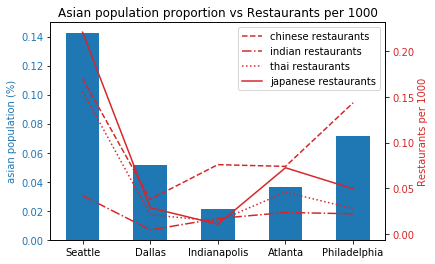

In [8]:
ax1 = plt.subplot(111)

color = 'tab:blue'
ax1.bar(cities, [p.loc['asian'] for p in pop_ethnicities_p_bycity], width=0.5, color=color, align='center')
ax1.set_ylabel('asian population (%)', color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(cities, [p.loc['chinese'] for p in rest_ethnicities_p_bycity], color = color, linestyle = '--', label = 'chinese restaurants')
ax2.plot(cities, [p.loc['indian'] for p in rest_ethnicities_p_bycity], color=color,linestyle = '-.', label = 'indian restaurants')
ax2.plot(cities, [p.loc['thai'] for p in rest_ethnicities_p_bycity], color=color, linestyle = ':',label = 'thai restaurants')
ax2.plot(cities, [p.loc['japanese'] for p in rest_ethnicities_p_bycity], color=color, linestyle = '-',label = 'japanese restaurants')
ax2.set_ylabel('Restaurants per 1000', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('Asian population proportion vs Restaurants per 1000')
plt.legend()
plt.savefig('../Output/Charts/rest_vs_pop_asian.png')
plt.show()

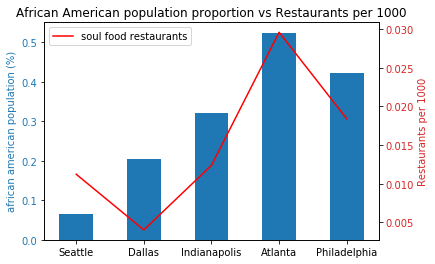

In [9]:
ax1 = plt.subplot(111)

color = 'tab:blue'
ax1.bar(cities, [p.loc['african_american'] for p in pop_ethnicities_p_bycity], width=0.5, color=color, align='center')
ax1.set_ylabel('african american population (%)', color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(cities, [p.loc['soul food'] for p in rest_ethnicities_p_bycity], color='r', label = 'soul food restaurants')
ax2.set_ylabel('Restaurants per 1000', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('African American population proportion vs Restaurants per 1000')
plt.legend()
plt.savefig('../Output/Charts/rest_vs_pop_african_american.png')
plt.show()

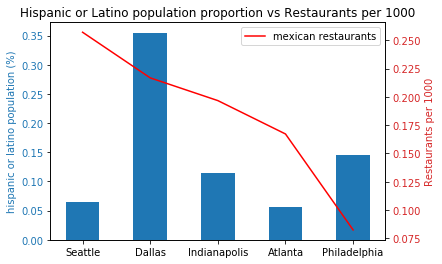

In [10]:
ax1 = plt.subplot(111)

color = 'tab:blue'
ax1.bar(cities, [p.loc['hispanic_or_latino'] for p in pop_ethnicities_p_bycity], width=0.5, color=color, align='center')
ax1.set_ylabel('hispanic or latino population (%)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(cities, [p.loc['mexican'] for p in rest_ethnicities_p_bycity], color='r', label = 'mexican restaurants')
ax2.set_ylabel('Restaurants per 1000', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Hispanic or Latino population proportion vs Restaurants per 1000')
plt.legend()
plt.savefig('../Output/Charts/rest_vs_pop_hispanic.png')
plt.show()

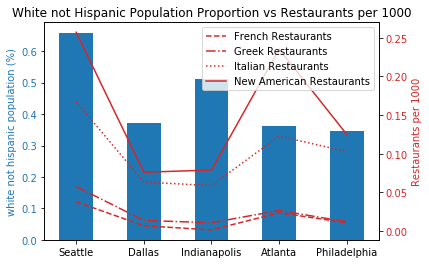

In [11]:
ax1 = plt.subplot(111)

color = 'tab:blue'
ax1.bar(cities, [p.loc['white_not_hispanic'] for p in pop_ethnicities_p_bycity], width=0.5, color=color, align='center')
ax1.set_ylabel('white not hispanic population (%)', color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(cities, [p.loc['french'] for p in rest_ethnicities_p_bycity], color = color, linestyle = '--', label = 'French Restaurants')
ax2.plot(cities, [p.loc['greek'] for p in rest_ethnicities_p_bycity], color=color,linestyle = '-.', label = 'Greek Restaurants')
ax2.plot(cities, [p.loc['italian'] for p in rest_ethnicities_p_bycity], color=color, linestyle = ':',label = 'Italian Restaurants')
ax2.plot(cities, [p.loc['new american'] for p in rest_ethnicities_p_bycity], color=color, linestyle = '-',label = 'New American Restaurants')
ax2.set_ylabel('Restaurants per 1000', color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.title('White not Hispanic Population Proportion vs Restaurants per 1000')
plt.legend()
plt.savefig('../Output/Charts/rest_vs_pop_white.png')
plt.show()

In [12]:
#returns number of restaurants of that ethnicity within that zipcode
len(df[(df['zipcode'] == 19104)&(df['rest_ethnicity'] == 'soul food')])

#return race% within that zipcode
byzipcode[byzipcode['zipcode'] == 19104]['african_american%']

3    0.422787
Name: african_american%, dtype: float64

In [13]:
byzipcode.columns

Index(['zipcode', 'geopoint', 'city', 'population', 'per_capita_income',
       'white', 'african_american', 'native_american', 'asian',
       'native_hawaiian_pacific_islander', 'other_race', 'two_or_more_races',
       'white_not_hispanic', 'hispanic_or_latino', 'white%',
       'african_american%', 'native_american%', 'asian%',
       'native_hawaiian_pacific_islander%', 'other_race%',
       'two_or_more_races%', 'white_not_hispanic%', 'hispanic_or_latino%'],
      dtype='object')

In [14]:
byzipcode_compare_df = byzipcode.set_index('zipcode')
byzipcode_compare_df = byzipcode_compare_df.drop(columns = ['geopoint','per_capita_income', 'white','african_american', 'native_american', 'asian','native_hawaiian_pacific_islander', 'other_race', 'two_or_more_races','white_not_hispanic', 'hispanic_or_latino'])

rest_ethnicity_list = df['rest_ethnicity'].unique()

for ethnicity in rest_ethnicity_list:
    byzipcode_compare_df[f'{ethnicity}'] = ''

byzipcode_compare_df

zipcodes = byzipcode_compare_df.index

for zipcode in zipcodes:
    for ethnicity in rest_ethnicity_list:
        byzipcode_compare_df.loc[zipcode,f'{ethnicity}'] = 100*len(df[(df['zipcode'] == zipcode)&(df['rest_ethnicity'] == f'{ethnicity}')])/byzipcode_compare_df.loc[zipcode,'population']

In [15]:
byzipcode_compare_df.columns

Index(['city', 'population', 'white%', 'african_american%', 'native_american%',
       'asian%', 'native_hawaiian_pacific_islander%', 'other_race%',
       'two_or_more_races%', 'white_not_hispanic%', 'hispanic_or_latino%',
       'chinese', 'french', 'greek', 'indian', 'italian', 'japanese',
       'brazilian', 'mexican', 'new american', 'soul food', 'thai'],
      dtype='object')

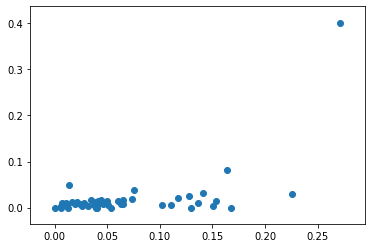

In [16]:
compare_phila_zipcodes = byzipcode_compare_df[byzipcode_compare_df['city']=='Philadelphia']
plt.scatter(compare_phila_zipcodes['asian%'],compare_phila_zipcodes['chinese'])

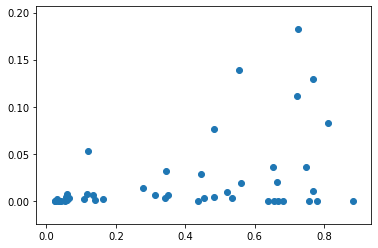

In [17]:
plt.scatter(compare_phila_zipcodes['white_not_hispanic%'],compare_phila_zipcodes['new american'])

(0, 0.03)

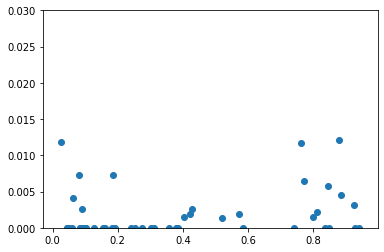

In [18]:
plt.scatter(compare_phila_zipcodes['african_american%'],compare_phila_zipcodes['soul food'])
plt.ylim(0,0.03)

(0, 0.03)

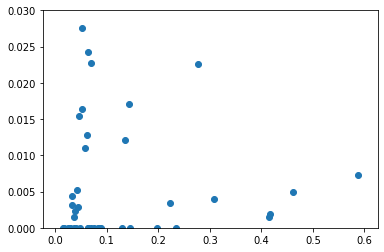

In [19]:
plt.scatter(compare_phila_zipcodes['hispanic_or_latino%'],compare_phila_zipcodes['mexican'])
plt.ylim(0,0.03)

# Gentrification Analysis

In [20]:
#create new price dimension based on number of $ for easy analysis
price_df = df.copy()
price_df['price_int'] = [ len(price) for price in price_df['price']]
price_df.head()

,rest_name,rest_ethnicity,rest_latitude,rest_longitude,zipcode,zipcode geopoint,city,price,rating,population,...,white%,african_american%,native_american%,asian%,native_hawaiian_pacific_islander%,other_race%,two_or_more_races%,white_not_hispanic%,hispanic_or_latino%,price_int
0,Nan Zhou Hand Drawn Noodle House,chinese,39.955401,-75.156901,19107,"39.952112,-75.15853",Philadelphia,$,4.0,13696.0,...,0.590318,0.081557,0.005330,0.271612,0.00000,0.009565,0.041618,0.554907,0.051329,1
1,Dim Sum Garden,chinese,39.955399,-75.156727,19107,"39.952112,-75.15853",Philadelphia,$,4.0,13696.0,...,0.590318,0.081557,0.005330,0.271612,0.00000,0.009565,0.041618,0.554907,0.051329,1
2,Dim Sum House,chinese,39.951885,-75.172466,19103,"39.952162,-75.17406",Philadelphia,$$,4.0,24219.0,...,0.773401,0.061894,0.002973,0.117263,0.00128,0.004253,0.038936,0.721252,0.056856,2
3,Dan Dan,chinese,39.950249,-75.167595,19102,"39.952962,-75.16558",Philadelphia,$$,4.0,4937.0,...,0.778205,0.044561,0.002228,0.163865,0.00000,0.002836,0.008305,0.725744,0.052461,2
4,Sampan,chinese,39.949531,-75.162157,19107,"39.952112,-75.15853",Philadelphia,$$,4.0,13696.0,...,0.590318,0.081557,0.005330,0.271612,0.00000,0.009565,0.041618,0.554907,0.051329,2


## Atlanta 

In [30]:
#atlanta income distributiong
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

city = 'Atlanta'

city_data = byzipcode[byzipcode['city']== f'{city}']

lat = [float(point.split(',')[0]) for point in city_data['geopoint'] ]
lng = [float(point.split(',')[1]) for point in city_data['geopoint'] ]
locations = []
for i in range(len(lat)):
    locations.append((lat[i],lng[i]))
    
    
heatmap_layer = gmaps.heatmap_layer(locations,
                                    weights = city_data['per_capita_income'], 
                                    max_intensity= 100000,
                                    point_radius = 70)

expensive_rests = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)]
expensive_rests = expensive_rests[expensive_rests['city']==f'{city}']

r_locations = expensive_rests[['rest_latitude','rest_longitude']]
marker_layer = gmaps.marker_layer(r_locations)

fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [22]:
#altanta white population

figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

city = 'Atlanta'

city_data = byzipcode[byzipcode['city']== f'{city}']

lat = [float(point.split(',')[0]) for point in city_data['geopoint'] ]
lng = [float(point.split(',')[1]) for point in city_data['geopoint'] ]
locations = []
for i in range(len(lat)):
    locations.append((lat[i],lng[i]))
    
    
heatmap_layer = gmaps.heatmap_layer(locations,
                                    weights = city_data['white_not_hispanic%'], 
                                    max_intensity= 1,
                                    point_radius = 70)

expensive_rests = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)]
expensive_rests = expensive_rests[expensive_rests['city']==f'{city}']

r_locations = expensive_rests[['rest_latitude','rest_longitude']]
marker_layer = gmaps.marker_layer(r_locations)

fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [23]:
#atlanta black population

figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

city = 'Atlanta'

city_data = byzipcode[byzipcode['city']== f'{city}']

lat = [float(point.split(',')[0]) for point in city_data['geopoint'] ]
lng = [float(point.split(',')[1]) for point in city_data['geopoint'] ]
locations = []
for i in range(len(lat)):
    locations.append((lat[i],lng[i]))
    
    
heatmap_layer = gmaps.heatmap_layer(locations,
                                    weights = city_data['african_american%'], 
                                    max_intensity= 1,
                                    point_radius = 70)

expensive_rests = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)]
expensive_rests = expensive_rests[expensive_rests['city']==f'{city}']

r_locations = expensive_rests[['rest_latitude','rest_longitude']]
marker_layer = gmaps.marker_layer(r_locations)

fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

## Philadelphia 

In [24]:
#phila income distribution
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

city = 'Philadelphia'

city_data = byzipcode[byzipcode['city']== f'{city}']

lat = [float(point.split(',')[0]) for point in city_data['geopoint'] ]
lng = [float(point.split(',')[1]) for point in city_data['geopoint'] ]
locations = []
for i in range(len(lat)):
    locations.append((lat[i],lng[i]))
    
    
heatmap_layer = gmaps.heatmap_layer(locations,
                                    weights = city_data['per_capita_income'], 
                                    max_intensity= 100000,
                                    point_radius = 70)

expensive_rests = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)]
expensive_rests = expensive_rests[expensive_rests['city']==f'{city}']

r_locations = expensive_rests[['rest_latitude','rest_longitude']]
marker_layer = gmaps.marker_layer(r_locations)

fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [25]:
#phila white population

figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

city = 'Philadelphia'

city_data = byzipcode[byzipcode['city']== f'{city}']

lat = [float(point.split(',')[0]) for point in city_data['geopoint'] ]
lng = [float(point.split(',')[1]) for point in city_data['geopoint'] ]
locations = []
for i in range(len(lat)):
    locations.append((lat[i],lng[i]))
    
    
heatmap_layer = gmaps.heatmap_layer(locations,
                                    weights = city_data['white_not_hispanic%'], 
                                    max_intensity= 1,
                                    point_radius = 70)

expensive_rests = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)]
expensive_rests = expensive_rests[expensive_rests['city']==f'{city}']

r_locations = expensive_rests[['rest_latitude','rest_longitude']]
marker_layer = gmaps.marker_layer(r_locations)

fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [26]:
#phila black population

figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

city = 'Philadelphia'

city_data = byzipcode[byzipcode['city']== f'{city}']

lat = [float(point.split(',')[0]) for point in city_data['geopoint'] ]
lng = [float(point.split(',')[1]) for point in city_data['geopoint'] ]
locations = []
for i in range(len(lat)):
    locations.append((lat[i],lng[i]))
    
    
heatmap_layer = gmaps.heatmap_layer(locations,
                                    weights = city_data['african_american%'], 
                                    max_intensity= 1,
                                    point_radius = 70)

expensive_rests = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)]
expensive_rests = expensive_rests[expensive_rests['city']==f'{city}']

r_locations = expensive_rests[['rest_latitude','rest_longitude']]
marker_layer = gmaps.marker_layer(r_locations)

fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

## Dallas 

In [27]:
#Dallas income distribution
figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

city = 'Dallas'

city_data = byzipcode[byzipcode['city']== f'{city}']

lat = [float(point.split(',')[0]) for point in city_data['geopoint'] ]
lng = [float(point.split(',')[1]) for point in city_data['geopoint'] ]
locations = []
for i in range(len(lat)):
    locations.append((lat[i],lng[i]))
    
    
heatmap_layer = gmaps.heatmap_layer(locations,
                                    weights = city_data['per_capita_income'], 
                                    max_intensity= 100000,
                                    point_radius = 70)

expensive_rests = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)]
expensive_rests = expensive_rests[expensive_rests['city']==f'{city}']

r_locations = expensive_rests[['rest_latitude','rest_longitude']]
marker_layer = gmaps.marker_layer(r_locations)

fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [28]:
#Dallas white population

figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

city = 'Dallas'

city_data = byzipcode[byzipcode['city']== f'{city}']

lat = [float(point.split(',')[0]) for point in city_data['geopoint'] ]
lng = [float(point.split(',')[1]) for point in city_data['geopoint'] ]
locations = []
for i in range(len(lat)):
    locations.append((lat[i],lng[i]))
    
    
heatmap_layer = gmaps.heatmap_layer(locations,
                                    weights = city_data['white_not_hispanic%'], 
                                    max_intensity= 1,
                                    point_radius = 70)

expensive_rests = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)]
expensive_rests = expensive_rests[expensive_rests['city']==f'{city}']

r_locations = expensive_rests[['rest_latitude','rest_longitude']]
marker_layer = gmaps.marker_layer(r_locations)

fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [29]:
#Dallas hispanic population

figure_layout = {
    'width': '800px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure(layout=figure_layout)

city = 'Dallas'

city_data = byzipcode[byzipcode['city']== f'{city}']

lat = [float(point.split(',')[0]) for point in city_data['geopoint'] ]
lng = [float(point.split(',')[1]) for point in city_data['geopoint'] ]
locations = []
for i in range(len(lat)):
    locations.append((lat[i],lng[i]))
    
    
heatmap_layer = gmaps.heatmap_layer(locations,
                                    weights = city_data['hispanic_or_latino%'], 
                                    max_intensity= 1,
                                    point_radius = 70)

expensive_rests = price_df[(price_df['price_int']==3)|(price_df['price_int']==4)]
expensive_rests = expensive_rests[expensive_rests['city']==f'{city}']

r_locations = expensive_rests[['rest_latitude','rest_longitude']]
marker_layer = gmaps.marker_layer(r_locations)

fig.add_layer(heatmap_layer)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…